In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz, spectrogram
import matplotlib.pyplot as plt

In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 4  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

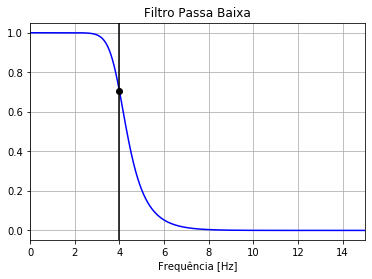

In [4]:
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Filtro Passa Baixa")
plt.xlabel('Frequência [Hz]')
plt.grid()

In [5]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
f1 = 2     # Sinal de interesse
f2 = 10    # Interferência 1
f3 = 14    # interferência 2

In [6]:
x =np.sin(2*np.pi*f1*t)

/Users/araujo/opt/anaconda3/envs/bayopt/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 150, using nperseg = 150
  warnings.warn('nperseg = {0:d} is greater than input length '


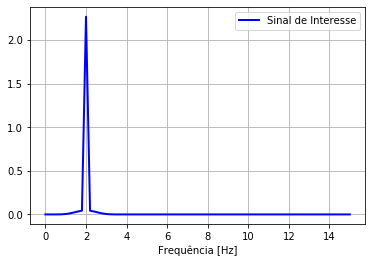

In [7]:
f, t, Sxx = spectrogram(x, fs)
plt.plot(f, np.abs(Sxx), 'b', linewidth=2, label='Sinal de Interesse')
plt.xlabel('Frequência [Hz]')
plt.grid()
plt.legend()
plt.show()

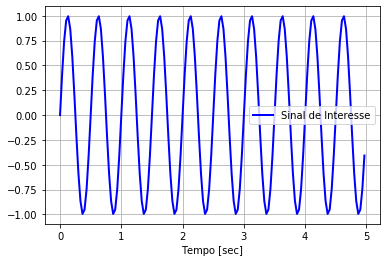

In [8]:
t = np.linspace(0, T, n, endpoint=False)

plt.plot(t, x, 'b', linewidth=2, label='Sinal de Interesse')
plt.xlabel('Tempo [sec]')
plt.grid()
plt.legend()
plt.show()

In [17]:
data = x + 1.5*np.cos(2*np.pi*f2*t) #+ 0.5*np.sin(2*np.pi*f3*t)

/Users/araujo/opt/anaconda3/envs/bayopt/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 150, using nperseg = 150
  warnings.warn('nperseg = {0:d} is greater than input length '


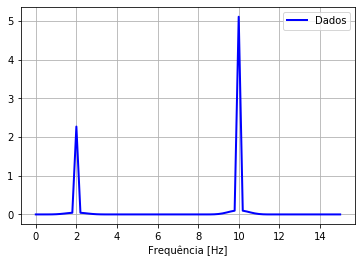

In [18]:
f, t, Sdata = spectrogram(data, fs)
plt.plot(f, np.abs(Sdata), 'b', linewidth=2, label='Dados')
plt.xlabel('Frequência [Hz]')
plt.grid()
plt.legend()
plt.show()

In [19]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

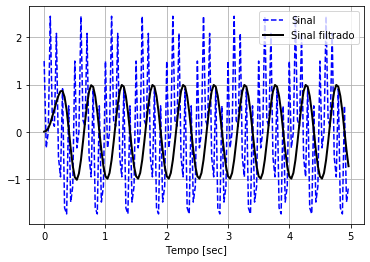

In [21]:
t = np.linspace(0, T, n, endpoint=False)
plt.plot(t, data, 'b--', label='Sinal')
plt.plot(t, y, 'k-', linewidth=2, label='Sinal filtrado')
plt.plot(t, x, 'r--', linewidth=2, label='Sinal de Interesse')
plt.xlabel('Tempo [sec]')
plt.grid()
plt.legend()

plt.show()